In [15]:
from tiny_data_warehouse import DataWarehouse
tdw = DataWarehouse()

df = tdw.event('arxiv_papers')
df

,title,abstract,url,published,tdw_timestamp
0,Panda-70M: Captioning 70M Videos with Multiple...,The quality of the data and annotation upper-b...,http://arxiv.org/abs/2402.19479v1,2024-02-29 18:59:50+00:00,2024-03-02 15:20:28.528195
0,Learning a Generalized Physical Face Model Fro...,Physically-based simulation is a powerful appr...,http://arxiv.org/abs/2402.19477v1,2024-02-29 18:59:31+00:00,2024-03-02 15:20:28.547171
0,The All-Seeing Project V2: Towards General Rel...,We present the All-Seeing Project V2: a new mo...,http://arxiv.org/abs/2402.19474v1,2024-02-29 18:59:17+00:00,2024-03-02 15:20:28.560878
0,Retrieval-Augmented Generation for AI-Generate...,The development of Artificial Intelligence Gen...,http://arxiv.org/abs/2402.19473v1,2024-02-29 18:59:01+00:00,2024-03-02 15:20:28.563475
0,Humanoid Locomotion as Next Token Prediction,We cast real-world humanoid control as a next ...,http://arxiv.org/abs/2402.19469v1,2024-02-29 18:57:37+00:00,2024-03-02 15:20:28.565966
...,...,...,...,...,...
0,Host Stars and How Their Compositions Influenc...,It has become a common practice within the exo...,http://arxiv.org/abs/2404.15422v1,2024-04-23 18:18:30+00:00,2024-04-25 07:17:15.474278
0,The log-open correspondence for two-component ...,A two-component Looijenga pair is a rational s...,http://arxiv.org/abs/2404.15412v1,2024-04-23 18:04:01+00:00,2024-04-25 07:17:15.568350
0,Uncertainty in latent representations of varia...,Deep learning methods are increasingly becomin...,http://arxiv.org/abs/2404.15390v1,2024-04-23 16:26:29+00:00,2024-04-25 07:17:15.676627
0,Advances and Open Challenges in Federated Lear...,The integration of Foundation Models (FMs) wit...,http://arxiv.org/abs/2404.15381v1,2024-04-23 09:44:58+00:00,2024-04-25 07:17:15.775197


In [16]:
len(df.index)

18312

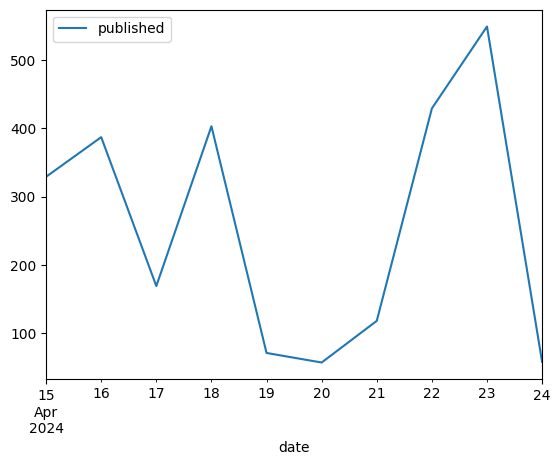

In [16]:
import pandas as pd
def plot_days(n_days):
    new_df = df.groupby(by=df.published.dt.date).agg({'published': 'count'})
    new_df['date'] = new_df.index
    new_df['published_count'] = new_df['published']


    NUM_OF_DAYS = 30
    new_df.reset_index(drop=True, inplace=True)
    new_df = new_df.sort_values(by='date', ascending=False).head(n_days)
    new_df['date'] = pd.to_datetime(new_df['date'])
    new_df.reset_index(drop=True, inplace=True)
    new_df.plot(x='date', y='published')
    
plot_days(10)

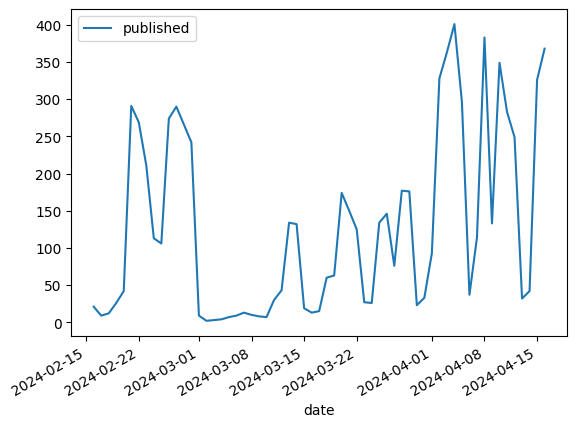

In [99]:
plot_days(60)

In [14]:
(tdw.event('arxiv_papers').duplicated(subset='url', keep='first').sum())

3410